<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Graficas_sofisticadas_especificas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficas sofisticadas específicas

A continuación veremos cómo crear algunos gráficas específicas que solucionan problemas particulares. Muchos de estos los crearemos con la librería Seaborn, que simplifica enormemente la creación de gráficas con fines estadísticos.

En la siguiente página existe un tutorial muy útil con criterios sobre qué tipo de gráfica elegir en función del tipo de datos que tenemos. Acceder desde https://www.data-to-viz.com/ 

Como siempre, empezamos importando las librerías que solemos utilizar.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importamos la librería principal que vamos a utilizar para realizar las gráficas, que es Seaborn.

In [0]:
import seaborn as sns
print(sns.__version__) #para que indique la versión de seaborn instalada en el entorno

0.9.0


Si la versión instalada no es la última, conviene actualizarla. Por ejemplo, desde el entorno de Colaboratory se puede hacer con el siguiente comando:

In [0]:
!pip install seaborn --upgrade


    100% |████████████████████████████████| 215kB 25.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import seaborn as sns
print('Ahora la versión de Seaborn es ', sns.__version__)

Ahora la versión de Seaborn es  0.9.0


## Gráficas de patrón promedio (ensemble average) series temporales con distintas repeticiones

Normalmente utilizaríamos datos de series temporales con la evolución de alguna variable durante un tiempo. En este caso crearemos unos datos ficticios basados en ondas sinusoidales que simulen 10 repeticiones de un movimiento con cierta variabilidad.

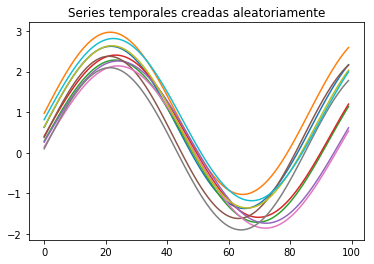

In [0]:
np.random.seed(1203) # para mantener la consistencia al crear los datos aleatorios

t = np.arange(0, 1.0, 1.0/100) #columna de tiempo, un segundo a 100 Hz

#Crea las condiciones de las ondas sinusoidales
numSerires=10
rango_of=[0,1]
rango_f=[1, 1.2]

of=np.random.rand(numSerires)*(rango_of[1]-rango_of[0])+rango_of[0]
a=2 #amplitud
f=np.random.rand(numSerires)*(rango_f[1]-rango_f[0])+rango_f[0]

DatosGraf = pd.DataFrame(np.array([of[i] + a*np.sin(2*np.pi*f[i]*t) for i in range(numSerires)]).T)

#Dibuja la gráfica para ver qué datos ha creado
fig, ax = plt.subplots()
plt.plot(DatosGraf)
plt.title('Series temporales creadas aleatoriamente')
plt.show()

Una vez tenemos los datos, creamos el gráfico con las medias y desviación típica instante a instante.

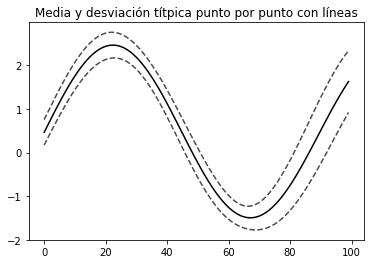

In [0]:
#Calcula la curva promedio de los dos conjuntos de datos punto por punto
curvProm=DatosGraf.mean(axis=1)

#Calcula la curva SD de los dos conjuntos de datos punto por punto
curvSD=DatosGraf.std(axis=1)

fig, ax = plt.subplots()
plt.plot(curvProm, 'k') #dibuja la línea central del promedio
plt.plot(curvProm-curvSD, 'k--', alpha=0.7)
plt.plot(curvProm+curvSD, 'k--', alpha=0.7)
plt.title('Media y desviación títpica punto por punto con líneas')
plt.show()

Para comprobar cuánto abarcan las líneas de las desviaciones típicas, dibujamos las líneas de los datos originales y encima las de la media y desviaciones típicas.

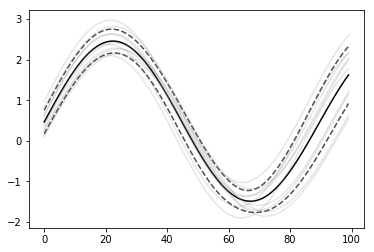

In [0]:
fig, ax = plt.subplots()
plt.plot(curvProm, 'k') #dibuja la línea central del promedio
plt.plot(curvProm-curvSD, 'k--', alpha=0.7)
plt.plot(curvProm+curvSD, 'k--', alpha=0.7)
plt.plot(DatosGraf, 'grey', alpha=0.2)
plt.show()

Ahora representamos el mismo tipo de gráfico pero con la zona de las desviaciones típicas sonbreadas.

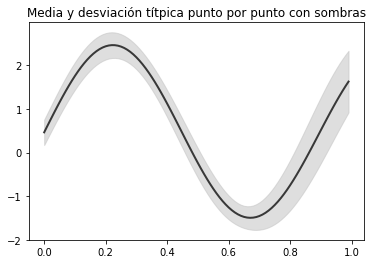

In [0]:
fig, ax = plt.subplots()
ax.plot(t, curvProm, 'k-', linewidth=2.0, alpha=0.75)
ax.fill_between(t, curvProm-curvSD, curvProm+curvSD, color='0.75', facecolor='0.25', alpha=0.5)

plt.title('Media y desviación títpica punto por punto con sombras')
plt.show()

## Gráfica de series temporales con distintas repeticiones de varios factores (ensemble average)

En este caso, tenemos un conjunto de datos con varias repeticiones de una misma variable, pero que se ejecuta de formas distintas según las condiciones de algún factor. Aunque podemos hacer las gráficas siguiendo el procedimiento anterior, también se puede realizar de una forma más simplificada utilizando la librería Seaborn.
En este ejemplo, vamos a analizar datos de fuerza vertical registrados durante una caída desde una altura sobre una plataforma de fuerzas. Tenemos dos condiciones en el experimento: caída con calzado y caída descalzo. Imaginemos que queremos visualizar si el calzado supone un cambio en el perfil de las fuerzas al realizar la recepción. Para ello vamos a representar en una gráfica todos los ensayos para tener una idea de qué está pasando.
En primer lugar importamos la base de datos.

In [0]:
import pandas as pd
import numpy as np

urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosCaidasCalzado-Descalzo.xlsx'
nombreHoja = 'Hoja1'

dfDatos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None,skiprows=1)
dfDatos.head()

,tiempo,C1,C2,C3,C4,C5,C6,D1,D2,D3,D4,D5,D6
0,0.000,0.730101,0.018738,0.003752,-0.003577,0.012049,-0.130856,0.422628,0.317697,0.129129,0.129086,0.532716,0.130117
1,0.001,0.628828,0.002236,0.003756,0.204561,0.574005,0.361467,0.428988,0.512810,0.208449,0.799580,0.715263,0.160612
2,0.002,0.806465,-0.004217,0.000937,0.814944,0.112552,0.301736,0.444010,0.688001,0.212746,1.410374,1.975003,0.383099
3,0.003,0.967941,-0.005653,-0.006099,-0.008915,0.259584,0.375975,0.446742,1.205023,0.238514,1.075329,1.975360,0.456019
4,0.004,1.005284,-0.009962,-0.013140,0.369048,0.575087,0.569312,0.449026,1.954973,0.276468,1.209931,1.443340,0.859848


La primera columna incluye el tiempo. Las siguientes incluyen la serie temporal de la repetición de cada uno de los seis participantes. Las primeras columnas corresponden a la condición calzado (C) y las últimas a la condición descalzo (D).
Los datos corresponden a la fuerza vertical en la caída, ya normalizados respecto al peso de cada participante. En este ejemplo el tiempo no está normalizado, pero en algunos casos puede ser conveniente normalizarlos para que todos los ensayos tengan el mismo número de datos.

Visualizar los datos siempre ayuda a mejorar la comprensión de lo que tenemos.

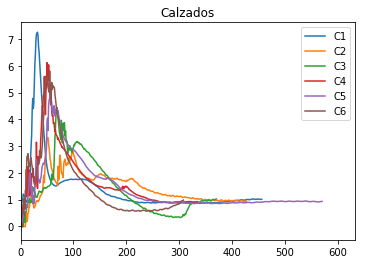

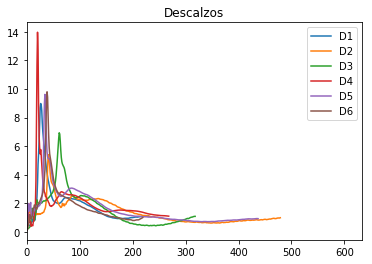

In [0]:
dfDatos.iloc[:, 1:7].plot(title='Calzados')
dfDatos.iloc[:, 7:].plot(title='Descalzos')

Lo siguiente será ordenar la base de datos para que tenga orientación vertical en lugar de horizontal, es decir, que se colocarán las series temporales unas debajo de otras. Además se debe crear una columna nueva para identificar cada factor.

In [0]:
#Transforma los datos en columnas por factores
numColsPorCondicion = 6
dfFactores = pd.melt(Datos, id_vars='tiempo', value_vars=Datos.columns[1:], var_name='Participante', value_name='Fz')
#Añade la columna con la condición
cond=['Calzado', 'Descalzo']
dfFactores['Condicion']= np.repeat(cond, len(Datos)*numColsPorCondicion, axis=0)
print(dfFactores.head()) #imprime las primeras filas
print(dfFactores.tail()) #imprime las últimas filas

   tiempo Participante        Fz Condicion
0   0.000           C1  0.730101   Calzado
1   0.001           C1  0.628828   Calzado
2   0.002           C1  0.806465   Calzado
3   0.003           C1  0.967941   Calzado
4   0.004           C1  1.005284   Calzado
      tiempo Participante  Fz Condicion
7603   0.629           D6 NaN  Descalzo
7604   0.630           D6 NaN  Descalzo
7605   0.631           D6 NaN  Descalzo
7606   0.632           D6 NaN  Descalzo
7607   0.633           D6 NaN  Descalzo


Ahora ya podemos realizar las gráficas directamente con Seaborn.
En primer lugar, realizamos una gráfica en la que se incluyan todas las repeticiones, diferenciando por colores cada factor.



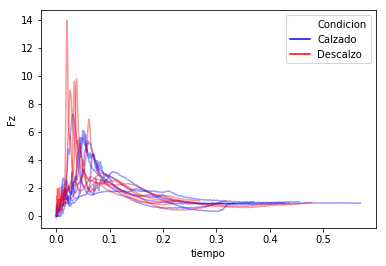

In [0]:
import seaborn as sns
#Con todos los datos
sns.lineplot(x='tiempo', y='Fz', hue='Condicion', units='Participante', data=dfFactores, palette=['b', 'r'], estimator=None, alpha=0.4)


Por último, realizamos un gráfico con la media de cada condición en forma de línea y un área sombreada que representa la desviación típica de todas las repeticiones.

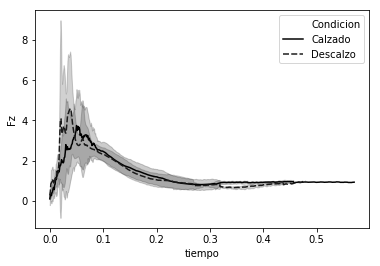

In [0]:
#Con medias en línea y desviación típica en sombra
sns.lineplot(x='tiempo', y='Fz', hue='Condicion', style='Condicion', data=dfFactores, palette=['k', [0.10,0.10,0.10]], ci='sd')

## Visualizar variables agrupadas por factores

Vamos a realizar un gráfico sofisticado agrupando por factores utilizando la librería Seaborn.
En primer lugar cargamos los datos.

In [0]:
import pandas as pd
import numpy as np

urlDatos='https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/BasesDatos/BaseDatosSaltoFactores(Fake).xlsx'
nombreHoja = 'Datos'

Datos = pd.read_excel(urlDatos, sheet_name=nombreHoja, index_col=None)
Datos.head()


,nº,Edad,Talla,Masa,Sexo,Grupo,Prepost,HCMJ,HSJ
0,1,23.794470,2.086830,74.274673,Hombre,Entrenado,pre,38.916430,48.380424
1,2,24.302798,1.871651,77.028427,Hombre,Entrenado,pre,39.853706,36.873923
2,3,23.041089,1.691582,75.242847,Hombre,Entrenado,pre,34.445890,39.361161
3,4,20.154899,1.758380,74.575467,Hombre,Entrenado,pre,44.264704,27.049540
4,5,20.179277,1.746612,75.645515,Hombre,Entrenado,pre,35.337067,35.277687


En este caso los datos ya tienen formato vertical por factores, por lo que no hay que reorientarlos. Una sola línea es suficiente para crear un gráfico directamente.

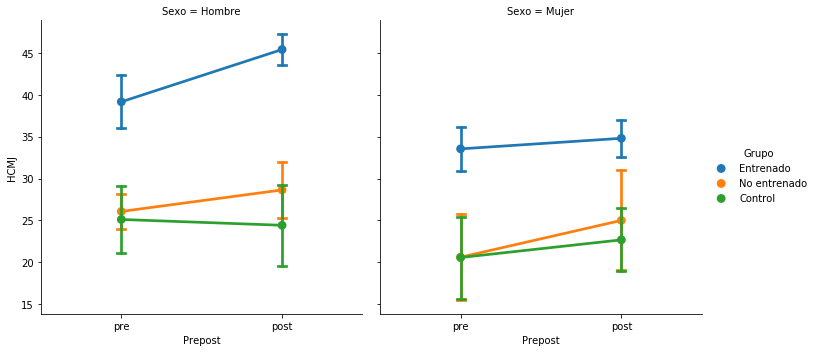

In [0]:
sns.catplot(x='Prepost', y='HCMJ', hue='Grupo', col='Sexo', data=Datos, ci='sd', kind='point', capsize=.05, dodge=True)

Aunque también podemos mejorar considerablemente el aspecto.

[]

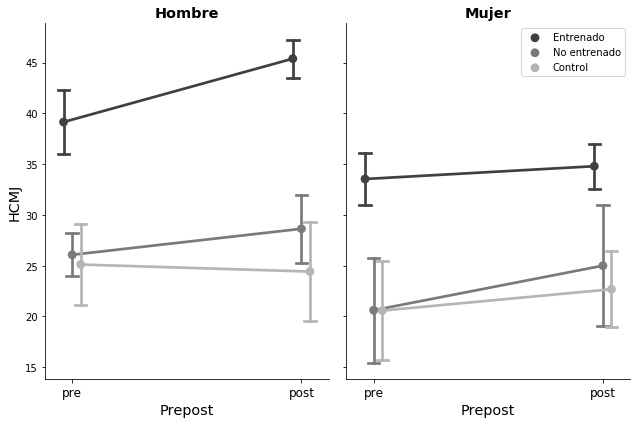

In [0]:
#Gráfico de factores
rc={'axes.labelsize': 'x-large', 'xtick.labelsize': 'large'}
with sns.plotting_context(rc=rc):  
    graycolors = sns.mpl_palette('Greys_r', 4) #paleta de grises, mejor para publicaciones en blanco y negro
    g = sns.catplot(x='Prepost', y='HCMJ', hue='Grupo', col='Sexo', data=Datos, ci='sd',
                               kind='point', capsize=.05, dodge=True, legend=False, palette=graycolors, height=6, aspect=.75)#1hue="Instrument", col="Skill", 
    g.set_titles('{col_name}', fontweight='bold') #para que quite el nombre del factor antes de la condición (Sexo = Hombre, Sexo = Mujer)
    g.set_axis_labels('', ) #quita el título general del eje X, ponía el nombre del factor (Prepost)
    
    plt.legend(loc='best')
plt.plot()

Según interese, se puede modificar el orden de los factores, cambiar la separación en columnas, etc.

---



[]

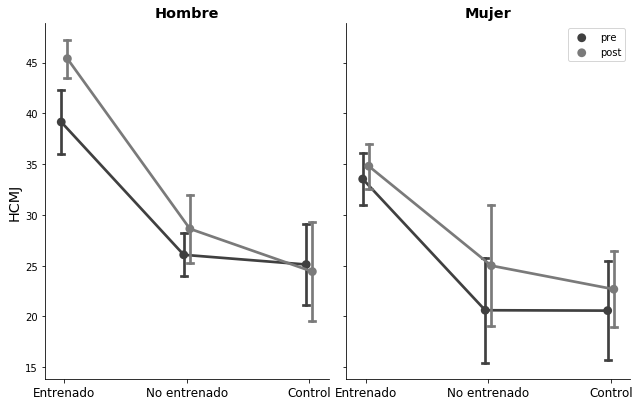

In [0]:
rc={'axes.labelsize': 'x-large', 'xtick.labelsize': 'large'}
with sns.plotting_context(rc=rc):  
    graycolors = sns.mpl_palette('Greys_r', 4) #paleta de grises, mejor para publicaciones en blanco y negro
    g = sns.catplot(x='Grupo', y='HCMJ', hue='Prepost', col='Sexo', data=Datos, ci='sd',
                               kind='point', capsize=.05, dodge=True, legend=False, palette=graycolors, height=6, aspect=.75)#1hue="Instrument", col="Skill", 
    g.set_titles('{col_name}', fontweight='bold') #para que quite el nombre del factor antes de la condición (Sexo = Hombre, Sexo = Mujer)
    g.set_axis_labels('', ) #quita el título general del eje X, ponía el nombre del factor (Prepost)
    
    plt.legend(loc='best')
plt.plot()

[]

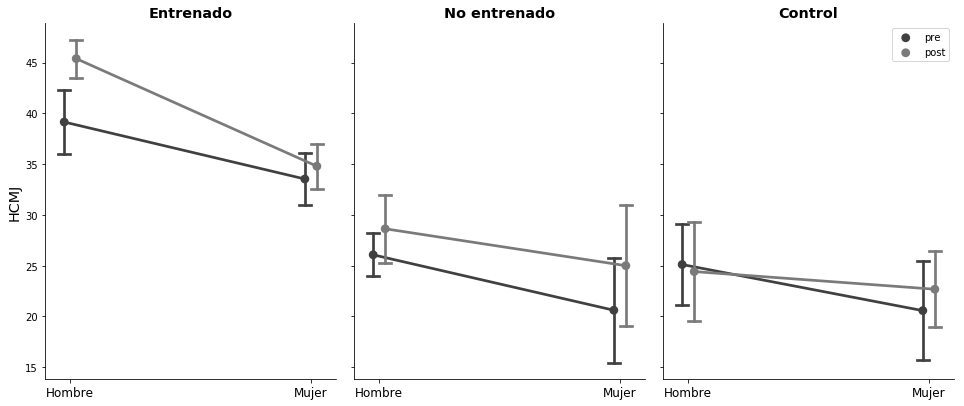

In [0]:
rc={'axes.labelsize': 'x-large', 'xtick.labelsize': 'large'}
with sns.plotting_context(rc=rc):  
    graycolors = sns.mpl_palette('Greys_r', 4) #paleta de grises, mejor para publicaciones en blanco y negro
    g = sns.catplot(x='Sexo', y='HCMJ', hue='Prepost', col='Grupo', data=Datos, ci='sd',
                               kind='point', capsize=.05, dodge=True, legend=False, palette=graycolors, height=6, aspect=.75)#1hue="Instrument", col="Skill", 
    g.set_titles('{col_name}', fontweight='bold') #para que quite el nombre del factor antes de la condición (Sexo = Hombre, Sexo = Mujer)
    g.set_axis_labels('', ) #quita el título general del eje X, ponía el nombre del factor (Prepost)
    
    plt.legend(loc='best')
plt.plot()

Una forma interesante de presentar los datos es combinando boxplot con strip plot.


Text(0.5, 0, '')

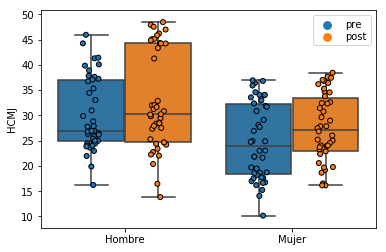

In [0]:
params = dict(data=Datos,
              x='Sexo',
              y='HCMJ',
              hue='Prepost',
              dodge=True)
g = sns.stripplot(edgecolor='black', linewidth=1, **params)
g_box = sns.boxplot(**params)

#Configura la leyenda
handles,labels = g.get_legend_handles_labels()
plt.legend(handles[2:],
           labels[2:],
           #bbox_to_anchor = (.3,.95),
           fontsize = 10,
           markerscale = 1,
           frameon=True,
           labelspacing=0.2)
plt.xlabel('') #quita el nombre del factor del eje X